# Ejercicio 19

## Enunciado
Crea un programa que:

1. Lea los datos referentes a la contaminación de Madrid de Marzo 2020 en un DataFrame de pandas.
2. Genere una nueva columna indicando el número de mediciones de **NO2** del día no válidas.
3. Crea un mapa de calor donde poder observar el resultado del punto anterior en función del día y la estación.

## Datos

- Listado de las estaciones de control: [enlace](https://datos.madrid.es/egob/catalogo/212629-1-estaciones-control-aire.csv)
- Datos 2020: [enlace](https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip)
- Datos 2019: [enlace](https://datos.madrid.es/egob/catalogo/201200-42-calidad-aire-horario.zip)
- Interpretación de los datos: [enlace](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)

### ¿Qué cosas nuevas necesitamos saber?
- Funciones lambda.
- Creación de nuevas columnas en un DataFrame.

### Funciones lambda.

Las funciones lambda o funciones anónimas son aquellas que no requieren de definición previa. Para crear una es tan sencillo como en los siguientes ejemplos:

In [ ]:
dividir = lambda x, y: x / y # x e y indican que nuestra lambda necesita 2 parametros
print(dividir(10, 2)) # por ello llamamos a lambda con 2 argumentos

Podemos además hacer uso de otras funciones dentro de nuestras funciones lambda.

In [2]:
concatenar = lambda x: ''.join(x)
print(concatenar(['1','2','3','4','5']))

12345


### Creación de nuevas columnas en un DataFrame.

Veamos como crear nuevas columnas en un DataFrame. Para ello, primero generemos unos datos a modos de ejemplo.

In [3]:
# una vez instalada, realizaremos el siguiente import
import pandas as pd
import random

In [4]:
data = {'numeros': [random.randint(75, 125) for _ in range(100)]} # generamos 100 números aleatorios ente 75 y 125

In [5]:
df = pd.DataFrame(data)
df

,numeros
0,113
1,100
2,114
3,114
4,84
...,...
95,103
96,120
97,103
98,99


In [6]:
# veamos como crear una columna que nos indique si es par
df['es_par'] = (df['numeros'] % 2) == 0
df

,numeros,es_par
0,113,False
1,100,True
2,114,True
3,114,True
4,84,True
...,...,...
95,103,False
96,120,True
97,103,False
98,99,False


In [7]:
# ahora hagamos una nueva columna multiplicando el número oginal por 5
df['por_5'] = df['numeros'] * 5
df

,numeros,es_par,por_5
0,113,False,565
1,100,True,500
2,114,True,570
3,114,True,570
4,84,True,420
...,...,...,...
95,103,False,515
96,120,True,600
97,103,False,515
98,99,False,495


In [8]:
# o simplemente una columna con un valor constante
df['constante'] = 'Constante'
df

,numeros,es_par,por_5,constante
0,113,False,565,Constante
1,100,True,500,Constante
2,114,True,570,Constante
3,114,True,570,Constante
4,84,True,420,Constante
...,...,...,...,...
95,103,False,515,Constante
96,120,True,600,Constante
97,103,False,515,Constante
98,99,False,495,Constante


In [9]:
# supongamos que ahora quiero crear una columna con un número aleatorio...
# lo normal sería hacer esto, pero...
df['random'] = random.randint(1, 100)
df

,numeros,es_par,por_5,constante,random
0,113,False,565,Constante,94
1,100,True,500,Constante,94
2,114,True,570,Constante,94
3,114,True,570,Constante,94
4,84,True,420,Constante,94
...,...,...,...,...,...
95,103,False,515,Constante,94
96,120,True,600,Constante,94
97,103,False,515,Constante,94
98,99,False,495,Constante,94


In [10]:
# como podemos ver, todos tienen el mismo valor, por qué?
# porque el número aleatorio solo lo ha creado una vez y luego ha asignado ese valor a todas la columnas
# paa hacerlo correctamente, debemos hacerlo de esta manera para generar tantos numeros aleatorios como
# filas tenga el df
df['random'] = df.apply(lambda x: random.randint(1, 10), axis=1) # axis = 1 indica que la operación se realiza a nivel de fila
df

,numeros,es_par,por_5,constante,random
0,113,False,565,Constante,5
1,100,True,500,Constante,9
2,114,True,570,Constante,4
3,114,True,570,Constante,10
4,84,True,420,Constante,9
...,...,...,...,...,...
95,103,False,515,Constante,6
96,120,True,600,Constante,10
97,103,False,515,Constante,3
98,99,False,495,Constante,8


In [11]:
# tambien podemos generar un numero aletorio comprendendido entre los valores de dos columnas
# por ejemplo
df['random_numeros_por5'] = df[['numeros', 'por_5']].apply(lambda x: random.randint(x[0], x[1]), axis=1)
df

,numeros,es_par,por_5,constante,random,random_numeros_por5
0,113,False,565,Constante,5,389
1,100,True,500,Constante,9,265
2,114,True,570,Constante,4,562
3,114,True,570,Constante,10,492
4,84,True,420,Constante,9,410
...,...,...,...,...,...,...
95,103,False,515,Constante,6,395
96,120,True,600,Constante,10,563
97,103,False,515,Constante,3,112
98,99,False,495,Constante,8,224


In [12]:
# por último, también podemos aplicar lambdas a nivel de columna
df['numeros_mas_10'] = df['numeros'].apply(lambda x: x+10)
df

,numeros,es_par,por_5,constante,random,random_numeros_por5,numeros_mas_10
0,113,False,565,Constante,5,389,123
1,100,True,500,Constante,9,265,110
2,114,True,570,Constante,4,562,124
3,114,True,570,Constante,10,492,124
4,84,True,420,Constante,9,410,94
...,...,...,...,...,...,...,...
95,103,False,515,Constante,6,395,113
96,120,True,600,Constante,10,563,130
97,103,False,515,Constante,3,112,113
98,99,False,495,Constante,8,224,109


Esto se debe a que cuando hacemos algo del tipo df[['', '']] estamos obteniendo otro DataFrame mientras que cuando hacemos df[''] obtenemos solo la columna en cuestión (serie) y por ello ejecutamos la lambda no a nivel de fila si no a nivel de columna (para cada elemento de la misma).

Eso es todo, a por el ejercicio!

**NOTA**: En la solución del Ejercicio 18 se explica como crear gráficos a partir de lo datos de un DataFrame en el apartado de Bonus del final.

Puedes hacerlo como prefieras, pero si lo vas a hacer directamente sobre el DataFrame, es probable que necesites [pivotar](https://www.geeksforgeeks.org/python-pandas-pivot/) alguna columna.

## Solución

In [13]:
import pandas as pd

In [14]:
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv("../Datos/mar_mo20.csv", sep=";")

In [16]:
no2 = df[df['MAGNITUD'] == 8]

In [17]:
v_columns = [col for col in no2.columns if col.startswith('V')]

In [18]:
no2['mediciones_invalidas'] = df[v_columns].apply(lambda l: sum([1 for item in l if item == 'N']), axis=1)

c:\users\juan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data = no2[['ESTACION', 'DIA', 'mediciones_invalidas']].sort_values(['ESTACION', 'DIA'])

In [20]:
data_to_print = data.pivot(index='ESTACION', columns='DIA', values='mediciones_invalidas')

In [21]:
 # esto sirve para rellenar con 0 aquellos datos para los que no conazcamos su valor
data_to_print = data_to_print.fillna(0)

In [22]:
data_to_print

DIA,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
ESTACION,,,,,,,,,,,,,,,,,,,,,
4,0.0,13.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


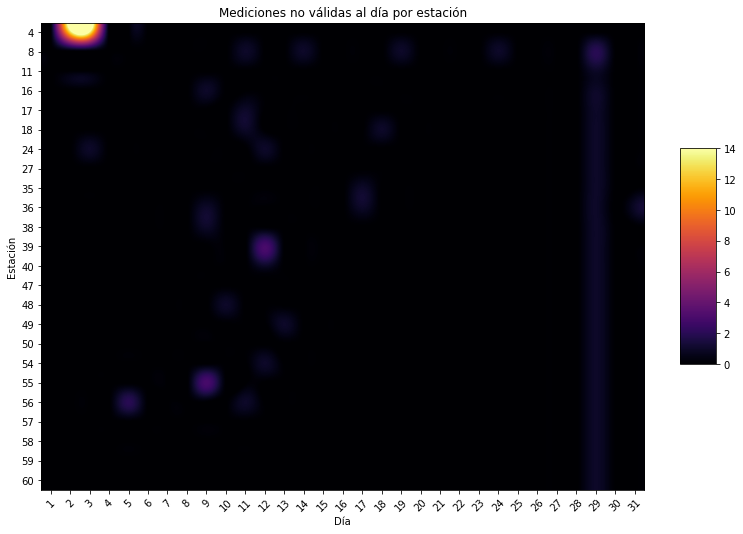

In [23]:
x_labels = data_to_print.columns
y_labels = data_to_print.index

fig, ax = plt.subplots(figsize=(10, 10))

#2019
ax.set_title("Mediciones no válidas al día por estación")
ax.set_xlabel("Día")
ax.set_ylabel("Estación")
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)
im = ax.imshow(data_to_print, interpolation='lanczos', cmap='inferno')
ax.figure.tight_layout()

#color bar
fig.subplots_adjust(right=.9)
cbar_ax = fig.add_axes([0.95, 0.35, 0.05, 0.30])
clb = plt.colorbar(im , cax=cbar_ax)

plt.show()